## Observations and Insights

## Dependencies and starter code

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df=study_results.merge(mouse_metadata,how = 'outer', on='Mouse ID')

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [222]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grpby_drug = df.groupby('Drug Regimen')

drug_mean = grpby_drug['Tumor Volume (mm3)'].mean()
drug_variance = grpby_drug['Tumor Volume (mm3)'].var()
drug_std = grpby_drug['Tumor Volume (mm3)'].std()
drug_SEM = grpby_drug['Tumor Volume (mm3)'].sem()
drug_median = grpby_drug['Tumor Volume (mm3)'].median()
grpby_drug_df = pd.DataFrame(drug_mean)
grpby_drug_df=grpby_drug_df.rename(columns ={'Tumor Volume (mm3)':'Mean'})

grpby_drug_df['Median']=drug_median
grpby_drug_df['Variance']=drug_variance
grpby_drug_df['STD DEV']=drug_std
grpby_drug_df['SEM']=drug_SEM

grpby_drug_df

,Mean,Median,Variance,STD DEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

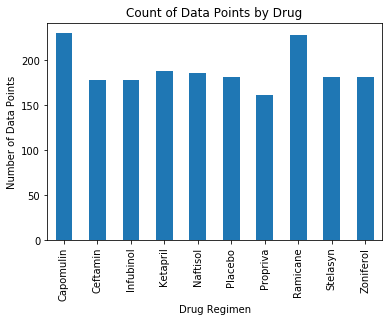

In [250]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grpby_drugc = df.groupby('Drug Regimen')
drug_count = grpby_drugc['Drug Regimen'].count()
grpby_drug_dfc = pd.DataFrame(drug_count)
bar_drugc_pd = grpby_drug_dfc.plot.bar(legend=False,title='Count of Data Points by Drug')
plt.ylabel('Number of Data Points')

Text(0.5, 1.0, 'Count of Data Points by Drug')

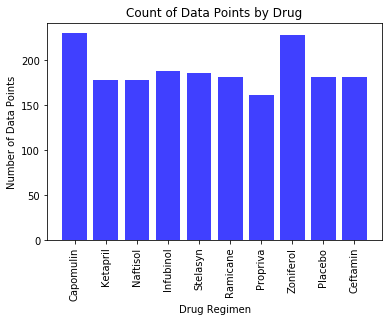

In [248]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs =  df['Drug Regimen'].unique()
y_pos = np.arange(len(drugs))
plt.bar(y_pos, drug_count ,alpha=.75,color='blue')
plt.xticks(y_pos, drugs,rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Count of Data Points by Drug')

## Pie plots

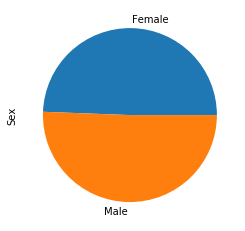

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grpby_sex = df.groupby('Sex')
sex_count = grpby_sex['Sex'].count()
grpby_sex_dfc = pd.DataFrame(sex_count)
pie=grpby_sex_dfc.plot.pie(y='Sex',legend=False)

pie

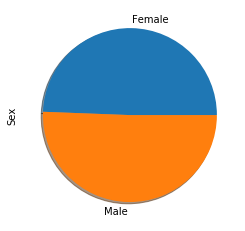

In [253]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female','Male'
sizes = sex_count
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,shadow=True, startangle=360)
ax1.xaxis.set_label_text("")
plt.ylabel('Sex')
plt.show()


## Quartiles, outliers and boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_tumor_df = df[(df['Drug Regimen']=='Capomulin') & (df['Timepoint']==45) ]

cap_tumor_size=cap_tumor_df['Tumor Volume (mm3)']
quartiles = tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
cap_outliers_tumor = cap_tumor_df [(cap_tumor_df['Tumor Volume (mm3)']<lower_bound) | (cap_tumor_df['Tumor Volume (mm3)']>upper_bound)] 

cap_outliers_tumor


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [192]:
Ramicane_tumor_df = df[(df['Drug Regimen']=='Ramicane') & (df['Timepoint']==45) ]

Ramicane_tumor_size=Ramicane_tumor_df['Tumor Volume (mm3)']
quartiles = tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Ramicane_outliers_tumor = Ramicane_tumor_df [(Ramicane_tumor_df['Tumor Volume (mm3)']<lower_bound) | (Ramicane_tumor_df['Tumor Volume (mm3)']>upper_bound)] 

Ramicane_outliers_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [193]:
Infubinol_tumor_df = df[(df['Drug Regimen']=='Infubinol') & (df['Timepoint']==45) ]

Infubinol_tumor_size=Infubinol_tumor_df['Tumor Volume (mm3)']
quartiles = tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Infubinol_outliers_tumor = Infubinol_tumor_df [(Infubinol_tumor_df['Tumor Volume (mm3)']<lower_bound) | (Infubinol_tumor_df['Tumor Volume (mm3)']>upper_bound)] 
 
Infubinol_outliers_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
224,c139,45,72.226731,2,Infubinol,Male,11,28
243,y163,45,67.685569,3,Infubinol,Female,17,27
253,k483,45,66.196912,3,Infubinol,Female,20,30
279,z581,45,62.754451,3,Infubinol,Female,24,25
289,a251,45,65.525743,1,Infubinol,Female,21,25
907,a203,45,67.973419,2,Infubinol,Female,20,23
1423,a685,45,66.083066,3,Infubinol,Male,8,30
1459,e476,45,62.435404,1,Infubinol,Male,23,26
1659,f345,45,60.918767,1,Infubinol,Male,23,26


In [194]:
Ceftamin_tumor_df = df[(df['Drug Regimen']=='Ceftamin') & (df['Timepoint']==45) ]

Ceftamin_tumor_size=Ceftamin_tumor_df['Tumor Volume (mm3)']
quartiles = tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Ceftamin_outliers_tumor = Ceftamin_tumor_df [(Ceftamin_tumor_df['Tumor Volume (mm3)']<lower_bound) | (Ceftamin_tumor_df['Tumor Volume (mm3)']>upper_bound)] 
 
Ceftamin_outliers_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1313,x822,45,61.386660,3,Ceftamin,Male,3,29
1326,l733,45,64.299830,1,Ceftamin,Female,4,30
1354,l471,45,67.748662,1,Ceftamin,Female,7,28
1364,y865,45,64.729837,3,Ceftamin,Male,23,26
1374,y769,45,68.594745,4,Ceftamin,Female,6,27
1384,l661,45,59.851956,3,Ceftamin,Male,18,26
1394,j296,45,61.849023,3,Ceftamin,Female,24,30
1411,w151,45,67.527482,3,Ceftamin,Male,24,25
1477,k210,45,68.923185,3,Ceftamin,Male,15,28
1487,a275,45,62.999356,3,Ceftamin,Female,20,28


In [212]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



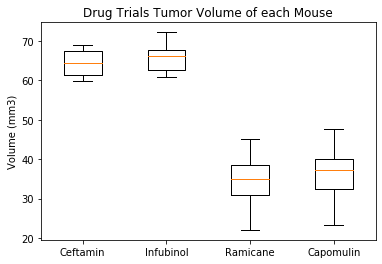

In [214]:
data =[Ceftamin_tumor_size,Infubinol_tumor_size,Ramicane_tumor_size,cap_tumor_size]
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Trials Tumor Volume of each Mouse')
combined =plt.boxplot(data)
combined = ax1.set_ylabel('Volume (mm3)')
plt.xticks([1, 2, 3,4], ['Ceftamin', 'Infubinol', 'Ramicane','Capomulin'])
plt.show()


## Line and scatter plots

Text(0, 0.5, 'Tumor Volume(mm3)')

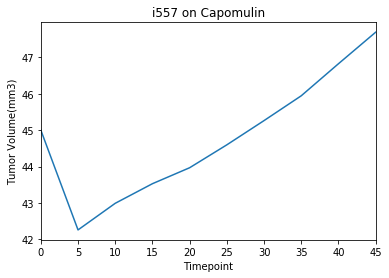

In [254]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df = df.loc[df['Drug Regimen'].isin(['Capomulin'])]
mouse_df = df.loc[df['Mouse ID'].isin(['i557'])]
mouse_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot();
plt.title('i557 on Capomulin')
plt.ylabel('Tumor Volume(mm3)')

Text(0.5, 1.0, 'Avg Weight VS. Avg Tumor Volume')

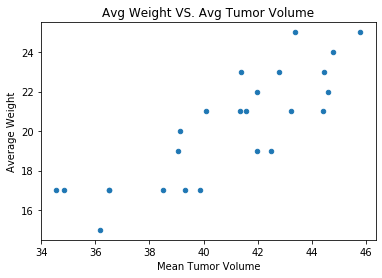

In [256]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = df.loc[df['Drug Regimen'].isin(['Capomulin'])]
grpby_scatter = Capomulin_df.groupby('Mouse ID')
scatter_mean = grpby_scatter['Tumor Volume (mm3)'].mean()
scatter_weight = grpby_scatter['Weight (g)'].mean()

grpby_scatter_dfm = pd.DataFrame(scatter_mean)
grpby_scatter_dfm=grpby_scatter_dfm.rename(columns ={'Tumor Volume (mm3)':'Mean Tumor Volume'})
grpby_scatter_dfm['Average Weight']=scatter_weight

scatter=grpby_scatter_dfm.plot.scatter(x='Mean Tumor Volume', y='Average Weight')
plt.title('Avg Weight VS. Avg Tumor Volume')

The correlation coefficient between weight and tumor size is 0.84


Text(0.5, 1.0, 'Avg Weight VS. Avg Tumor Volume')

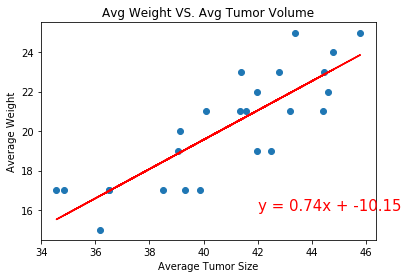

In [257]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen

correlation = round(st.pearsonr(scatter_mean,scatter_weight)[0],2)
print(f"The correlation coefficient between weight and tumor size is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_mean, scatter_weight)
regress_values = scatter_mean * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatter_mean, scatter_weight)
plt.plot(scatter_mean,regress_values,"r-")
plt.annotate(line_eq,(42,16),fontsize=15,color="red")
plt.xlabel('Average Tumor Size')
plt.ylabel('Average Weight')
plt.title('Avg Weight VS. Avg Tumor Volume')


# Three observations regarding the data

First there is a strong correlation between tumor volume and mouse weight (pearson 0.84). Secondly Capomulin and Ramicane performed very well in the trials. Neither drug had any outliers, and thier average tumor size was over 10mm3 smaller than the other drugs. This was due to a low variance, possibly indicating a very reliable formula. Finally, there may be some cause for concern, as there are an uneven number of data points for each drug trial in this data set. 






































